In [1]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

2025-09-15 11:14:02.952498: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 11:14:03.015209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exa

In [2]:
DATA_PATH = "./data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [3]:
download_dataset(DATA_PATH)

✅ Dataset já existe em: ./data
Pulando download...


In [4]:
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH)
X_test, y_test, _ = load_dataset(TEST_PATH)

X_train.shape, y_train.shape, LABEL_MAP

((28709, 48, 48, 3),
 (28709,),
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [5]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

OUTPUT_CLASSES = 7
INPUT_SHAPE = (48, 48, 3)


resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
    
}

2025-09-15 11:14:13.454327: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...
Epoch 1/60


2025-09-15 11:15:14.995534: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2080 - loss: 2.6337

2025-09-15 11:16:08.186207: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.2373 - loss: 2.4652 - val_accuracy: 0.3556 - val_loss: 1.7589 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - accuracy: 0.2949 - loss: 2.1076 - val_accuracy: 0.3746 - val_loss: 1.6625 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.3222 - loss: 1.9354 - val_accuracy: 0.3788 - val_loss: 1.6305 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.3396 - loss: 1.8338 - val_accuracy: 0.3875 - val_loss: 1.5965 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 58s 80ms/step - accuracy: 0.3519 - loss: 1.7600 - val_accuracy: 0.3957 - val_loss: 1.5761 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - accuracy: 0.3675 - loss: 1.6985 - val_accuracy: 0.4002 - val_loss: 1.5654 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accurac

2025-09-15 11:34:24.003413: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2120 - loss: 2.5844

2025-09-15 11:35:54.215968: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 115s 131ms/step - accuracy: 0.2482 - loss: 2.4090 - val_accuracy: 0.3628 - val_loss: 1.7419 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 122ms/step - accuracy: 0.3109 - loss: 2.0413 - val_accuracy: 0.3952 - val_loss: 1.6176 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.3370 - loss: 1.8885 - val_accuracy: 0.4072 - val_loss: 1.5911 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.3573 - loss: 1.7815 - val_accuracy: 0.4166 - val_loss: 1.5385 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.3744 - loss: 1.7055 - val_accuracy: 0.4208 - val_loss: 1.5165 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 123ms/step - accuracy: 0.3838 - loss: 1.6553 - val_accuracy: 0.4342 - val_loss: 1.4974 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 122ms/step -

2025-09-15 12:08:44.593579: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 148s 202ms/step - accuracy: 0.2269 - loss: 2.4329 - val_accuracy: 0.3413 - val_loss: 1.7241 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.2793 - loss: 2.1015 - val_accuracy: 0.3715 - val_loss: 1.6386 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.3003 - loss: 1.9581 - val_accuracy: 0.3784 - val_loss: 1.6055 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.3087 - loss: 1.8706 - val_accuracy: 0.3842 - val_loss: 1.5860 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.3240 - loss: 1.8013 - val_accuracy: 0.3918 - val_loss: 1.5735 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.3320 - loss: 1.7533 - val_accuracy: 0.3938 - val_loss: 1.5622 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 201ms/

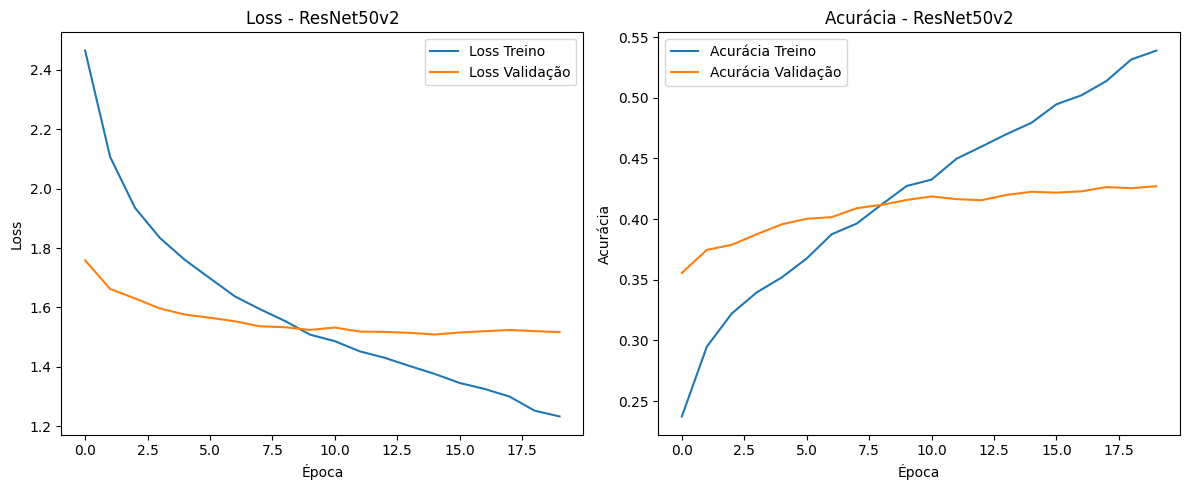

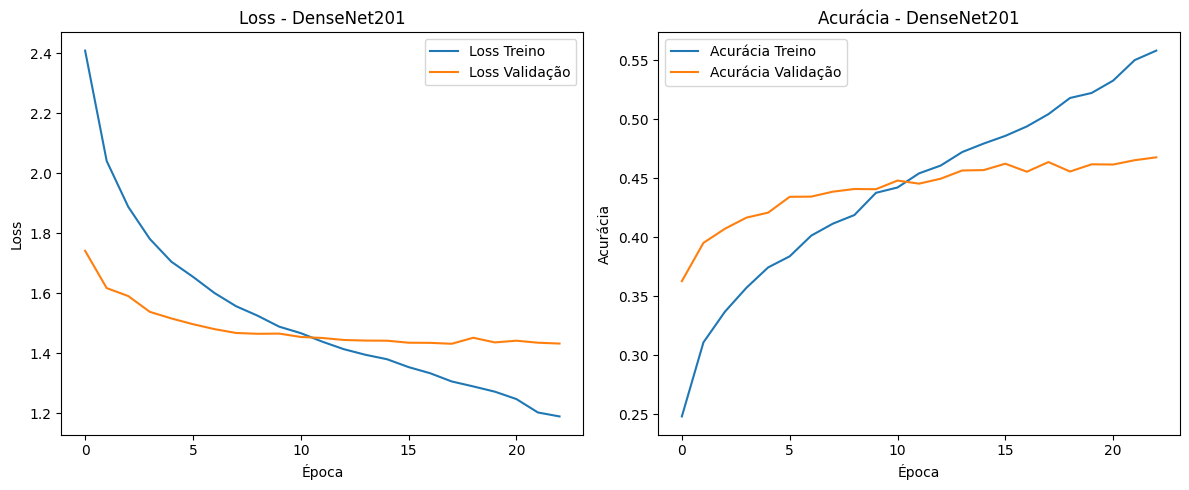

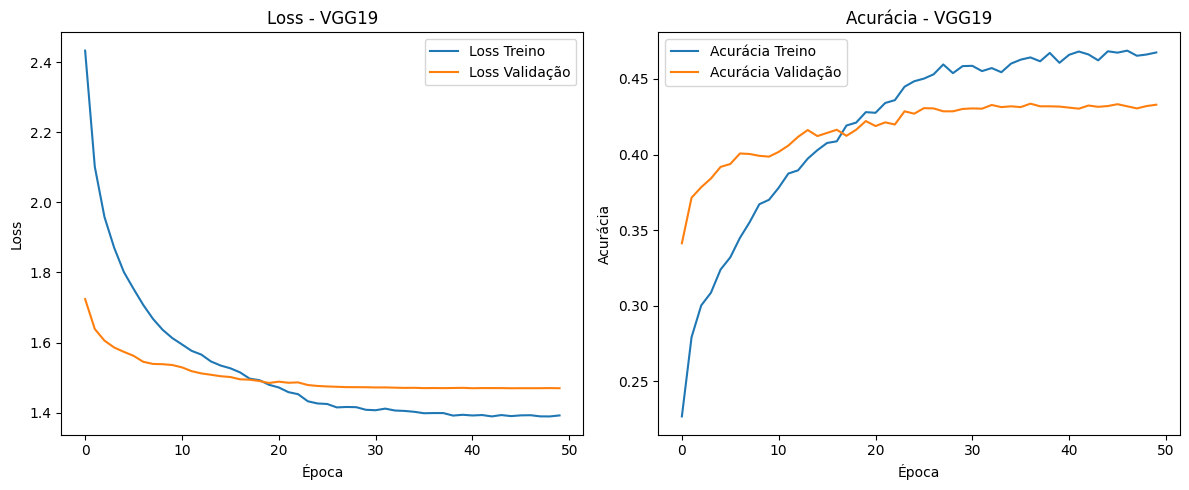

In [8]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [9]:
y_preds = {}
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.5505
Precision Score:  0.6091
Recall Score:     0.4788
F1 Score:         0.4938

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.41      0.46      3995
           1       0.94      0.14      0.25       436
           2       0.59      0.33      0.42      4097
           3       0.57      0.77      0.66      7215
           4       0.50      0.53      0.51      4965
           5       0.49      0.51      0.50      4830
           6       0.65      0.66      0.65      3171

    accuracy                           0.55     28709
   macro avg       0.61      0.48      0.49     28709
weighted avg       0.56      0.55      0.54     28709


Acurácia por classe:
- angry: 41.48%
- disgust: 14.22%
- fear: 33.24%
- happy: 77.48%
- neutral: 52.59%
- sad: 50.62%
- surprise: 65.53%


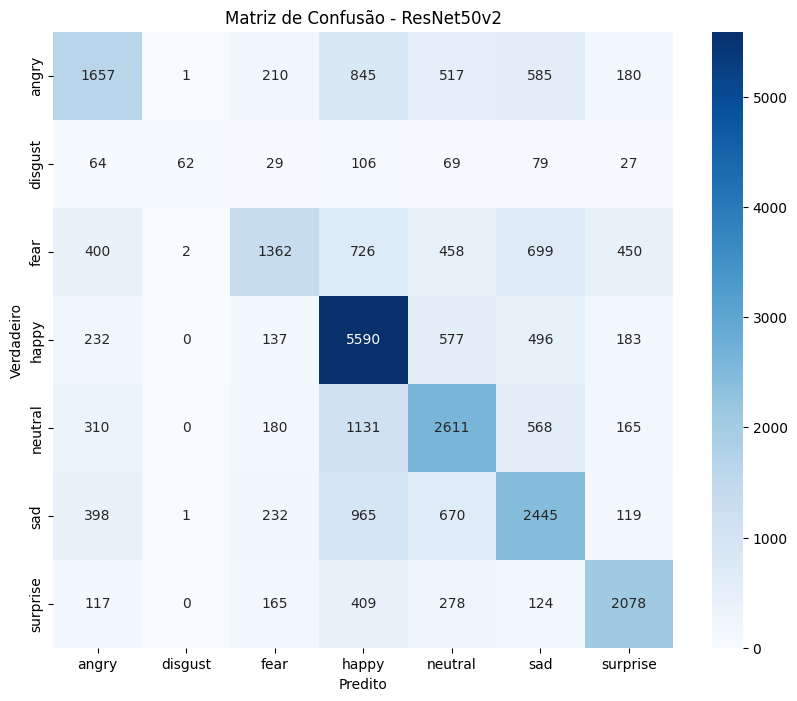

Métricas do modelo: DenseNet201
Accuracy Score:   0.5839
Precision Score:  0.6101
Recall Score:     0.5339
F1 Score:         0.5507

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.47      0.51      3995
           1       0.78      0.30      0.44       436
           2       0.61      0.37      0.46      4097
           3       0.62      0.77      0.69      7215
           4       0.55      0.56      0.56      4965
           5       0.51      0.54      0.53      4830
           6       0.64      0.72      0.68      3171

    accuracy                           0.58     28709
   macro avg       0.61      0.53      0.55     28709
weighted avg       0.58      0.58      0.58     28709


Acurácia por classe:
- angry: 47.18%
- disgust: 30.28%
- fear: 36.95%
- happy: 76.73%
- neutral: 56.19%
- sad: 54.08%
- surprise: 72.34%


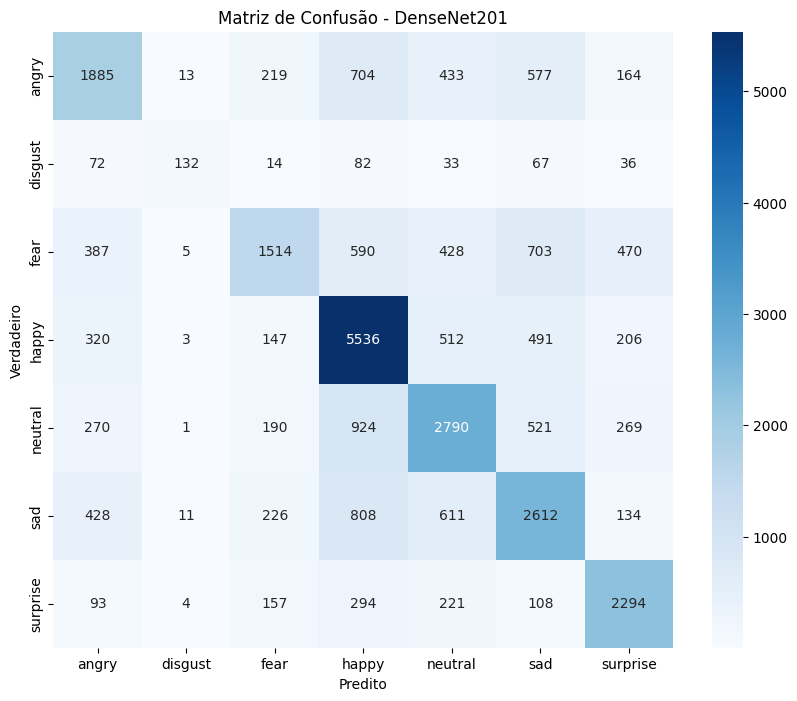

Métricas do modelo: VGG19
Accuracy Score:   0.511
Precision Score:  0.5618
Recall Score:     0.4662
F1 Score:         0.4876

Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.37      0.42      3995
           1       0.85      0.28      0.42       436
           2       0.51      0.33      0.40      4097
           3       0.52      0.72      0.60      7215
           4       0.47      0.47      0.47      4965
           5       0.44      0.43      0.44      4830
           6       0.66      0.66      0.66      3171

    accuracy                           0.51     28709
   macro avg       0.56      0.47      0.49     28709
weighted avg       0.51      0.51      0.50     28709


Acurácia por classe:
- angry: 36.97%
- disgust: 28.21%
- fear: 32.54%
- happy: 72.10%
- neutral: 47.47%
- sad: 43.44%
- surprise: 65.63%


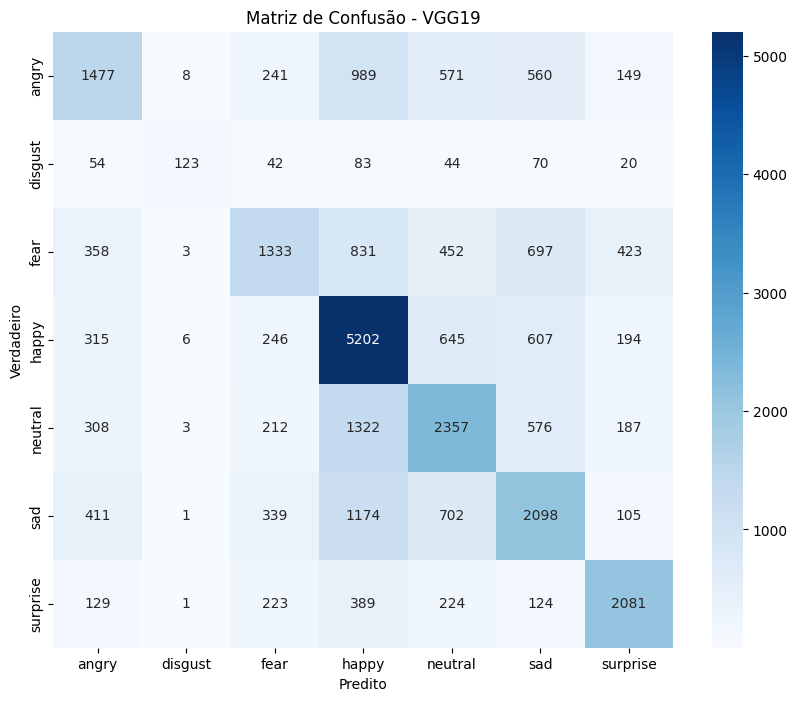

In [10]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_completa_flatten", LABEL_MAP)

In [11]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4324
Precision Score:  0.4751
Recall Score:     0.3671
F1 Score:         0.3727

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.25      0.28       958
           1       0.83      0.09      0.16       111
           2       0.34      0.19      0.24      1024
           3       0.50      0.68      0.58      1774
           4       0.39      0.41      0.40      1233
           5       0.36      0.38      0.37      1247
           6       0.59      0.57      0.58       831

    accuracy                           0.43      7178
   macro avg       0.48      0.37      0.37      7178
weighted avg       0.42      0.43      0.42      7178


Acurácia por classe:
- angry: 25.37%
- disgust: 9.01%
- fear: 18.85%
- happy: 68.26%
- neutral: 40.88%
- sad: 37.69%
- surprise: 56.92%


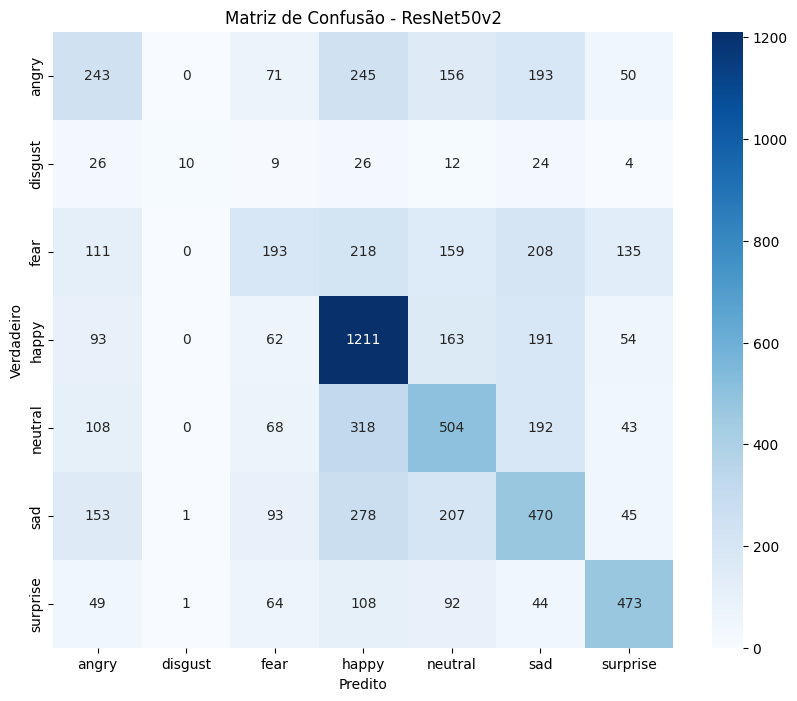

Métricas do modelo: DenseNet201
Accuracy Score:   0.4508
Precision Score:  0.4546
Recall Score:     0.4004
F1 Score:         0.409

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       958
           1       0.58      0.19      0.29       111
           2       0.38      0.22      0.28      1024
           3       0.54      0.67      0.60      1774
           4       0.39      0.41      0.40      1233
           5       0.38      0.39      0.39      1247
           6       0.56      0.61      0.58       831

    accuracy                           0.45      7178
   macro avg       0.45      0.40      0.41      7178
weighted avg       0.44      0.45      0.44      7178


Acurácia por classe:
- angry: 30.90%
- disgust: 18.92%
- fear: 22.46%
- happy: 67.08%
- neutral: 40.71%
- sad: 39.45%
- surprise: 60.77%


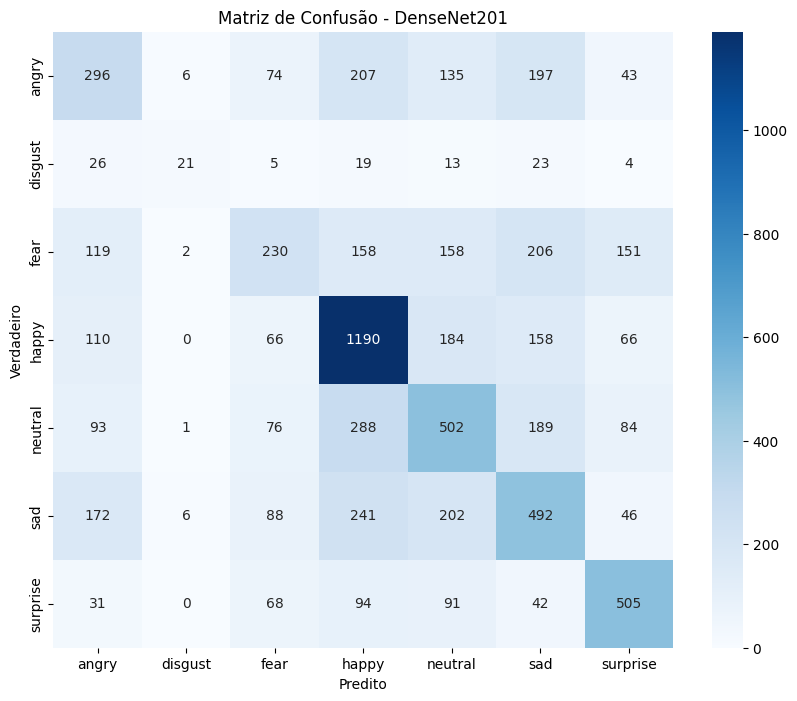

Métricas do modelo: VGG19
Accuracy Score:   0.4344
Precision Score:  0.4594
Recall Score:     0.3862
F1 Score:         0.3987

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.27      0.30       958
           1       0.66      0.19      0.29       111
           2       0.38      0.22      0.28      1024
           3       0.47      0.66      0.55      1774
           4       0.38      0.39      0.39      1233
           5       0.38      0.36      0.36      1247
           6       0.62      0.61      0.61       831

    accuracy                           0.43      7178
   macro avg       0.46      0.39      0.40      7178
weighted avg       0.43      0.43      0.42      7178


Acurácia por classe:
- angry: 27.24%
- disgust: 18.92%
- fear: 22.46%
- happy: 66.07%
- neutral: 39.50%
- sad: 35.53%
- surprise: 60.65%


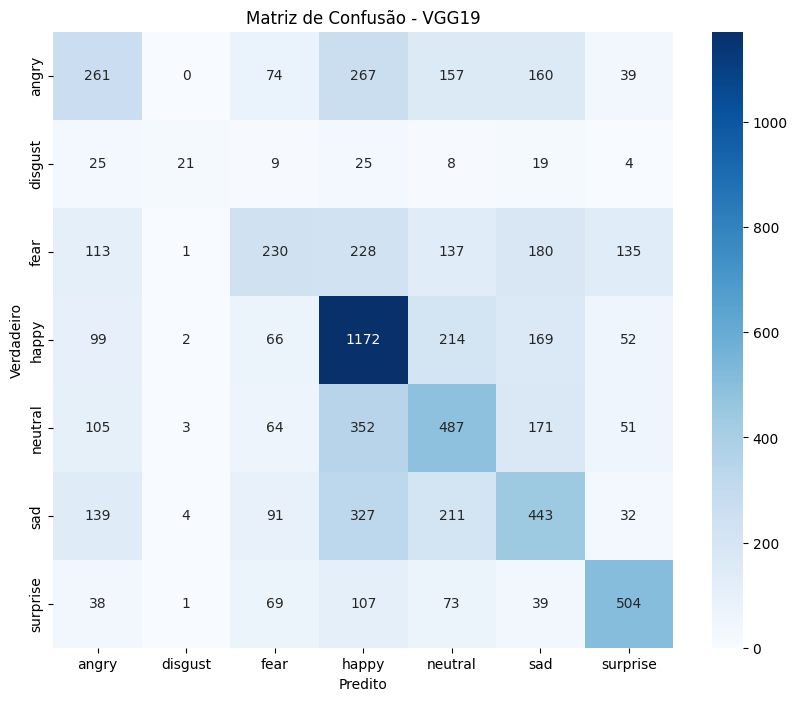

In [12]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name,"confusion_matrix_completa_flatten", LABEL_MAP, is_test=True)